In [16]:
import pandas as pd
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [ ]:
"""
epoch 변화를 주며 neuralNetwork만들기
epoch마다 정확도가 어떻게 되는지 시각화
"""

In [14]:
train=open('mnist_train.csv','r')
test=open('mnist_test.csv','r')

In [15]:
train_list=train.readlines()
test_list=test.readlines()
len(train_list)


60001

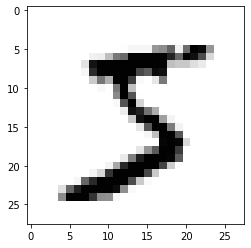

In [21]:
all_values=train_list[1].split(",")
type(all_values)
image_array=np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation=None)

In [23]:
scaled_input=(np.asfarray(all_values[1:])/255*0.99)+0.01

In [ ]:
class neuralNetwork():
    #신경망 초기화 기능
    def __init__(self,input_nodes,\
                hidden_nodes,output_nodes,learning_rate):
        self.inodes=input_nodes
        self.hnodes=hidden_nodes
        self.onodes=output_nodes
        self.lr=learning_rate
        #가중치는 행렬로 표현
        #입력/은닉 가중치 행렬:(은닉노드*입력노드)관행적으로
        self.wih=np.random.normal(0.0, #<-형식:normal(평균,표준편차,개수)
                         pow(self.hnodes,-0.5),
                         (self.hnodes,self.inodes))
        #입력/은닉 가중치 행렬:(은닉노드*입력노드)관행적으로
        self.who=np.random.normal(0.0,
                         pow(self.onodes,-0.5),
                         (self.onodes,self.hnodes))
        self.activation_function=lambda x:scipy.special.expit(x)
        pass
    #신경망 학습 기능(2단계)
    #1단계(forward propagation): 입력데이터에 대해 계산(query)
    #2단계(backward propagation): 예측값과 실제값의 차이를 계산->가중치 업데이트 단계
    def train(self,inputs_list,targets_list):
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
         #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        #오차=실제값-예측값
        
        #은닉 계층 노드에 대한 역전파된 오차
        #은닉 계층의 오차는 가중치에 의해 나뉜
        #출력 계층의 오차들을 재조합하여 계산
        hidden_errors=np.dot(self.who.T,output_errors)
        #은닉 계층과 출력 계층 간의 가중치 업데이트(who를 업데이트)
        self.who+=self.lr*np.dot\
        ((output_errors*final_outputs*(1.0-final_outputs)),
                       np.transpose(hidden_outputs))
        self.wih+=self.lr*np.dot\
        ((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),
                       np.transpose(hidden_inputs))
        
        pass
    #신경망 질의 기능
    #신경ㅇ망으로 들어오는 입력을 받아 출력하는 node
    def query(self,inputs_list):
        #입력리스트를 2차원 행렬로 변환
        inputs=np.array(inputs_list,ndmin=2).T
        #은닉계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉계층에서 나가는 신호 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #출력계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #출력계층에서 나가는 신호 계산
        final_outputs=self.activation_function(final_inputs)
        return final_outputs